### 헷갈리는 맞춤법 시각화 03

In [1]:
import pandas as pd
import numpy as np
import fontda

In [2]:
# 네이버 검색어 트렌드
file='./data/헷갈리는맞춤법.xlsx'
df=pd.read_excel(file,header=6)
df.head()

,날짜,되 돼,날짜.1,데 대,날짜.2,던 든,날짜.3,어떡해 어떻게,날짜.4,안 않,날짜.5,낳다 낫다,날짜.6,왠 웬,날짜.7,율 률
0,2016-01-01,47.74092,2016-01-01,41.78636,2016-01-01,9.36275,2016-01-01,32.29302,2016-01-01,38.02477,2016-01-01,8.18995,2016-01-01,49.05368,2016-01-01,57.17481
1,2016-02-01,48.94228,2016-02-01,40.71559,2016-02-01,9.20605,2016-02-01,29.39409,2016-02-01,31.91672,2016-02-01,7.03716,2016-02-01,47.07501,2016-02-01,49.82794
2,2016-03-01,49.69966,2016-03-01,44.50248,2016-03-01,10.01566,2016-03-01,35.23113,2016-03-01,31.79628,2016-03-01,8.20715,2016-03-01,47.90089,2016-03-01,64.72814
3,2016-04-01,43.11830,2016-04-01,40.06267,2016-04-01,9.08853,2016-04-01,33.03734,2016-04-01,28.37233,2016-04-01,8.63730,2016-04-01,46.05987,2016-04-01,59.85891
4,2016-05-01,45.88665,2016-05-01,42.89631,2016-05-01,10.47270,2016-05-01,32.01880,2016-05-01,28.42395,2016-05-01,8.86097,2016-05-01,49.26015,2016-05-01,55.95320


In [3]:
# 날짜 컬럼 제거
df=df.drop(['날짜.1','날짜.2','날짜.3','날짜.4','날짜.5','날짜.6','날짜.7'],axis=1)
df.head(10)

,날짜,되 돼,데 대,던 든,어떡해 어떻게,안 않,낳다 낫다,왠 웬,율 률
0,2016-01-01,47.74092,41.78636,9.36275,32.29302,38.02477,8.18995,49.05368,57.17481
1,2016-02-01,48.94228,40.71559,9.20605,29.39409,31.91672,7.03716,47.07501,49.82794
2,2016-03-01,49.69966,44.50248,10.01566,35.23113,31.79628,8.20715,47.90089,64.72814
3,2016-04-01,43.11830,40.06267,9.08853,33.03734,28.37233,8.63730,46.05987,59.85891
4,2016-05-01,45.88665,42.89631,10.47270,32.01880,28.42395,8.86097,49.26015,55.95320
5,2016-06-01,50.58762,44.28049,9.68921,37.42491,29.37026,10.20302,46.42119,59.48038
6,2016-07-01,53.02951,44.43718,9.12770,35.24418,29.45629,8.13833,49.32897,52.66689
7,2016-08-01,48.79864,40.89840,8.99712,34.57821,25.89470,7.24363,46.59325,51.72057
8,2016-09-01,46.73544,39.21389,9.31052,35.00914,25.61940,7.27804,45.73296,50.84308
9,2016-10-01,52.72917,40.80699,10.22460,35.94933,29.66276,6.74466,52.08189,60.13420


In [4]:
# 데이터 프레임 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       90 non-null     object 
 1   되 돼      90 non-null     float64
 2   데 대      90 non-null     float64
 3   던 든      90 non-null     float64
 4   어떡해 어떻게  90 non-null     float64
 5   안 않      90 non-null     float64
 6   낳다 낫다    90 non-null     float64
 7   왠 웬      90 non-null     float64
 8   율 률      90 non-null     float64
dtypes: float64(8), object(1)
memory usage: 6.5+ KB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

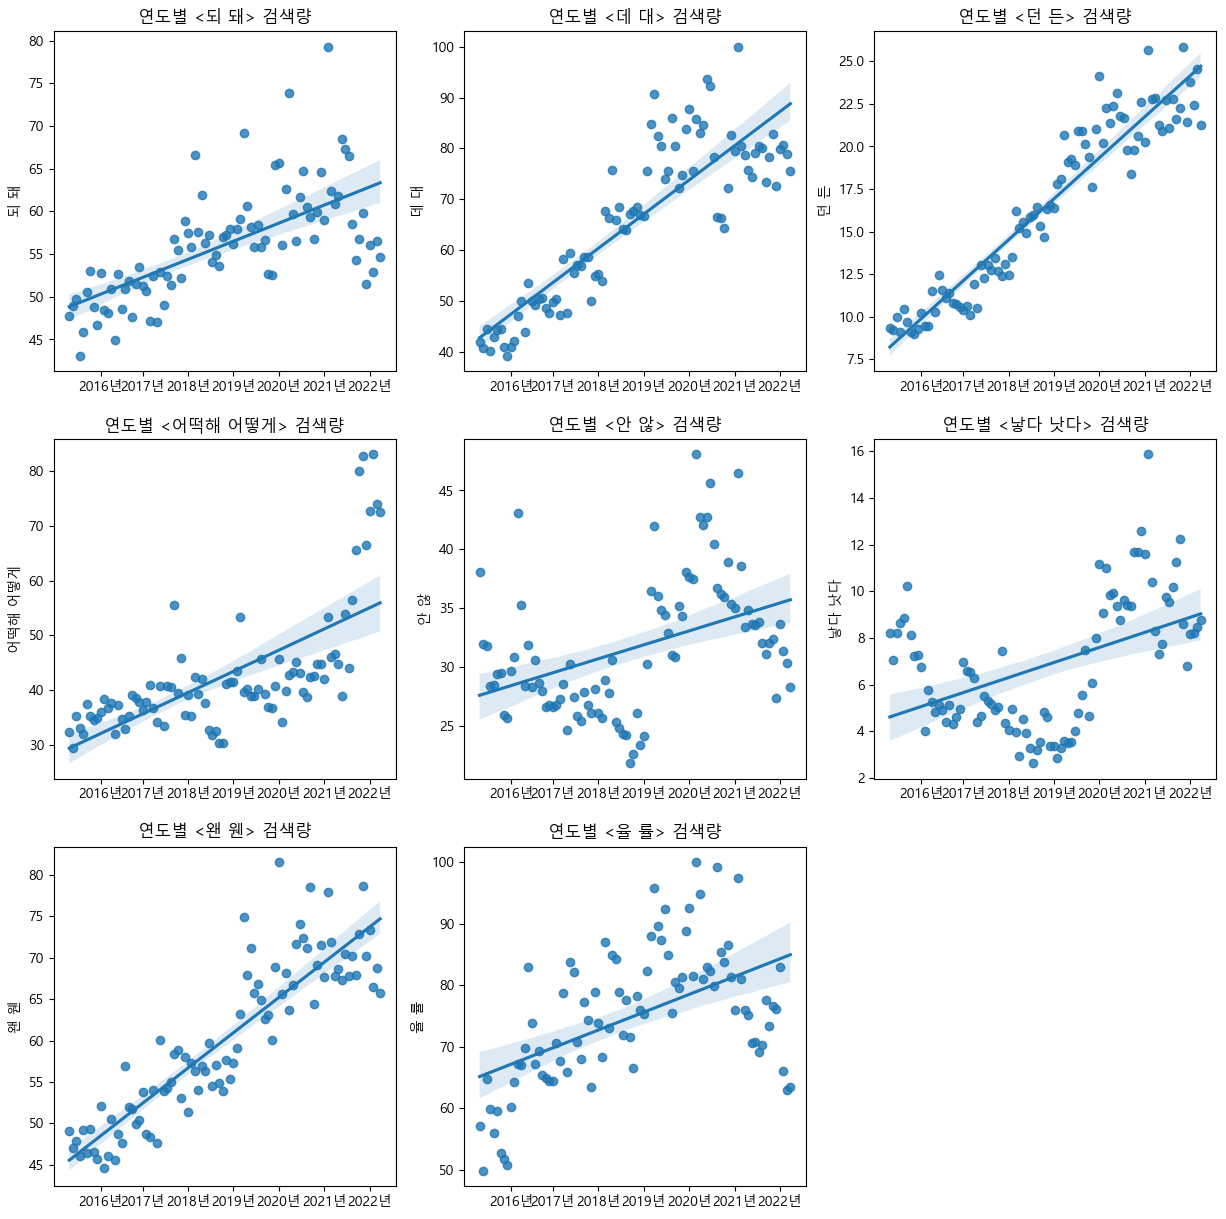

In [6]:
#  (1) 날짜를 그대로 쓰고 싶다면
from matplotlib import font_manager, rc
font_path="malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


fig=plt.figure(figsize=(15,15))

ax1=fig.add_subplot(3,3,1)
ax2=fig.add_subplot(3,3,2)
ax3=fig.add_subplot(3,3,3)
ax4=fig.add_subplot(3,3,4)
ax5=fig.add_subplot(3,3,5)
ax6=fig.add_subplot(3,3,6)
ax7=fig.add_subplot(3,3,7)
ax8=fig.add_subplot(3,3,8)


def showItems(ax,columnData):
    sns.regplot(x=[x for x in range(90)],y=columnData,ax=ax)
    years=["2016년","2017년","2018년","2019년","2020년","2021년","2022년"]
    ax.set_xticks([int(x*(90/7)+9) for x in range(7)])    # 90 범위 중 대충 0,12,24 ... 해서 7개 나타내겠다
    ax.set_xticklabels(years)    # 이름 지정

    
showItems(ax1,df["되 돼"])
showItems(ax2,df["데 대"])
showItems(ax3,df["던 든"])
showItems(ax4,df["어떡해 어떻게"])
showItems(ax5,df["안 않"])
showItems(ax6,df["낳다 낫다"])
showItems(ax7,df["왠 웬"])
showItems(ax8,df["율 률"])

ax1.set_title('연도별 <되 돼> 검색량')
ax2.set_title('연도별 <데 대> 검색량')
ax3.set_title('연도별 <던 든> 검색량')
ax4.set_title('연도별 <어떡해 어떻게> 검색량')
ax5.set_title('연도별 <안 않> 검색량')
ax6.set_title('연도별 <낳다 낫다> 검색량')
ax7.set_title('연도별 <왠 웬> 검색량')
ax8.set_title('연도별 <율 률> 검색량')


plt.show()

In [7]:
df['날짜']=df['날짜'].astype(str)
df['날짜']=df['날짜'].str.replace("-",'').astype(int)
df.head()

,날짜,되 돼,데 대,던 든,어떡해 어떻게,안 않,낳다 낫다,왠 웬,율 률
0,20160101,47.74092,41.78636,9.36275,32.29302,38.02477,8.18995,49.05368,57.17481
1,20160201,48.94228,40.71559,9.20605,29.39409,31.91672,7.03716,47.07501,49.82794
2,20160301,49.69966,44.50248,10.01566,35.23113,31.79628,8.20715,47.90089,64.72814
3,20160401,43.11830,40.06267,9.08853,33.03734,28.37233,8.63730,46.05987,59.85891
4,20160501,45.88665,42.89631,10.47270,32.01880,28.42395,8.86097,49.26015,55.95320


Text(0.5, 1.0, '연도별 <율 률> 검색량')

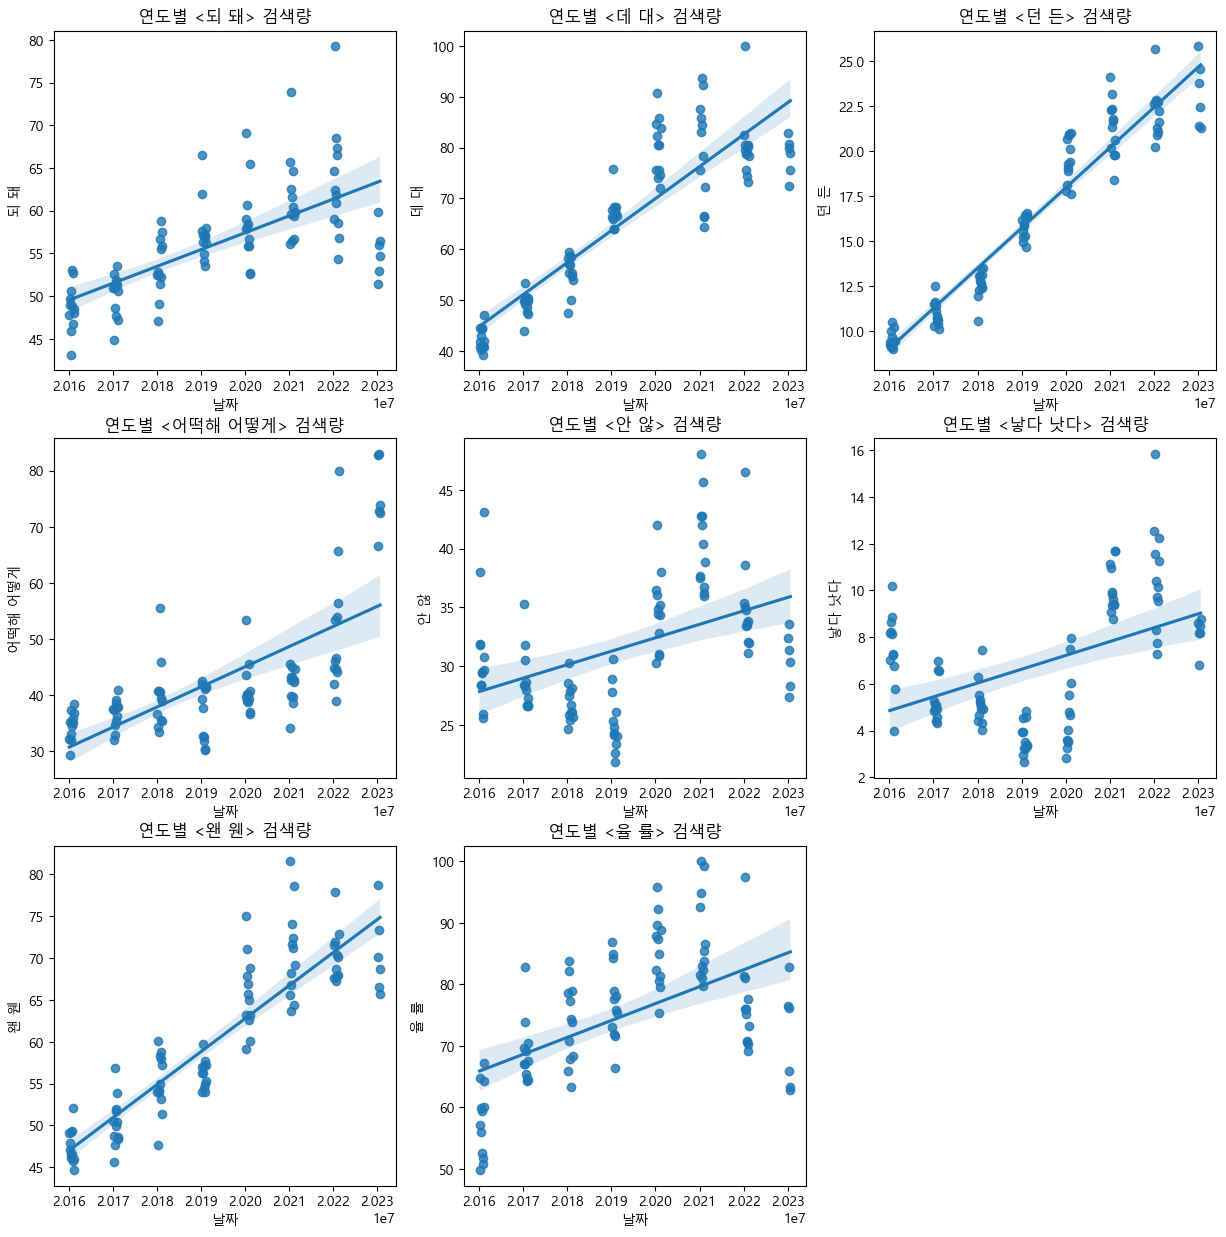

In [8]:
#  (2) 날짜를 정수로 바꿔서

from matplotlib import font_manager, rc
font_path="malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


fig=plt.figure(figsize=(15,15))

ax1=fig.add_subplot(3,3,1)
ax2=fig.add_subplot(3,3,2)
ax3=fig.add_subplot(3,3,3)
ax4=fig.add_subplot(3,3,4)
ax5=fig.add_subplot(3,3,5)
ax6=fig.add_subplot(3,3,6)
ax7=fig.add_subplot(3,3,7)
ax8=fig.add_subplot(3,3,8)


def showItems(ax,columnData,data):
    sns.regplot(x='날짜',y=columnData,data=data,ax=ax)
    
showItems(ax1,"되 돼",df)
showItems(ax2,"데 대",df)
showItems(ax3,"던 든",df)
showItems(ax4,"어떡해 어떻게",df)
showItems(ax5,"안 않",df)
showItems(ax6,"낳다 낫다",df)
showItems(ax7,"왠 웬",df)
showItems(ax8,"율 률",df)

ax1.set_title('연도별 <되 돼> 검색량')
ax2.set_title('연도별 <데 대> 검색량')
ax3.set_title('연도별 <던 든> 검색량')
ax4.set_title('연도별 <어떡해 어떻게> 검색량')
ax5.set_title('연도별 <안 않> 검색량')
ax6.set_title('연도별 <낳다 낫다> 검색량')
ax7.set_title('연도별 <왠 웬> 검색량')
ax8.set_title('연도별 <율 률> 검색량')